# 利用TensorFlow实现多项式回归

输入$x$和输出$y$之间的关系是多项式关系，即：
$$y = a + bx + cx^2 + dx^3 + ....$$

### 练习(30min)：
对给定的数据进行拟合，已知x指数最大不超过4，绘制损失函数的曲线，绘制最终预测结果图

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 载入数据

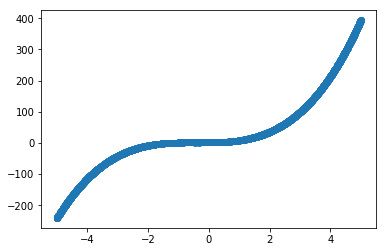

In [9]:
import pickle
with open('./poly.pkl', 'rb') as f:
    x, y = pickle.load(f)
# 绘制曲线
plt.scatter(x, y)
plt.show()

## 对数据进行预处理

* 分为训练集测试集
* 定义产生batch生成器

In [10]:
whole = np.array([x, y]).T
train = whole[:-64]
test = whole[-64:]

In [11]:
def gen_batch(data):
    for i in range(len(data) // 64):
        pos = 64 * i
        yield data[pos : pos + 64]

### 超参数

In [12]:
# 学习率
lr = 0.00001
epoch = 1000

## 定义计算图

In [13]:
graph = tf.Graph()
with graph.as_default():
    # 定义placeholder
    x_t = tf.placeholder(shape=[None, 1], dtype=tf.float64, name='x')
    y_t = tf.placeholder(shape=[None, 1], dtype=tf.float64, name='y')
    
    # 计算x的n次方
    with tf.name_scope("compute_power_of_x"):
        x_pow = tf.concat([tf.ones(shape=tf.shape(x_t), dtype=tf.float64), 
                           x_t, tf.pow(x_t, 2), tf.pow(x_t, 3), tf.pow(x_t, 4)], axis=1)
    # 定义权重
    W = tf.Variable(tf.truncated_normal(shape=(5, 1), dtype=tf.float64), name="weight_matrix")
    # 计算多项式
    y_pred = tf.matmul(x_pow, W)
    with tf.name_scope("calculate_loss"):
        # 定义loss
        loss = tf.reduce_mean(tf.pow(y_pred - y_t, 2))
    # 使用SGD对loss进行优化
    opt = tf.train.GradientDescentOptimizer(lr).minimize(loss)

## 运行计算图 训练模型

In [14]:
l_arr = []
with tf.Session(graph=graph) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    step= 0
    for epoch in range(epoch):
        for minibatch in gen_batch(train):
            _, l = sess.run([opt, loss], 
                            feed_dict={x_t: np.reshape(minibatch[:, 0], (-1, 1)), 
                                       y_t: np.reshape(minibatch[:, 1], (-1, 1))})
            step += 1
            if step % 100 == 0:
                print("Step: {}, Training Loss:{:>10.4f}".format(step, l))
                l_arr.append(l)
    print("Training Finished")
    res, l = sess.run([W, loss], 
                            feed_dict={x_t: np.reshape(test[:, 0], (-1, 1)), 
                                       y_t: np.reshape(test[:, 1], (-1, 1))})
    print("Testing Loss:{:>11.4f}".format(l))

Step: 100, Training Loss:  175.5927
Step: 200, Training Loss:  135.7859
Step: 300, Training Loss:  144.7575
Step: 400, Training Loss:  151.4379
Step: 500, Training Loss:  132.4418
Step: 600, Training Loss:  107.0169
Step: 700, Training Loss:  116.4547
Step: 800, Training Loss:  119.9667
Step: 900, Training Loss:  117.5353
Step: 1000, Training Loss:  121.0698
Step: 1100, Training Loss:  104.9696
Step: 1200, Training Loss:   97.9688
Step: 1300, Training Loss:  105.2417
Step: 1400, Training Loss:   86.4448
Step: 1500, Training Loss:   87.6073
Step: 1600, Training Loss:   86.9452
Step: 1700, Training Loss:   83.8349
Step: 1800, Training Loss:   93.0134
Step: 1900, Training Loss:   80.0309
Step: 2000, Training Loss:   80.4872
Step: 2100, Training Loss:   80.5066
Step: 2200, Training Loss:   80.8201
Step: 2300, Training Loss:   64.2217
Step: 2400, Training Loss:   64.3929
Step: 2500, Training Loss:   74.8435
Step: 2600, Training Loss:   49.2899
Step: 2700, Training Loss:   67.8126
Step: 2800

Step: 22000, Training Loss:    0.3812
Step: 22100, Training Loss:    0.3386
Step: 22200, Training Loss:    0.3260
Step: 22300, Training Loss:    0.2613
Step: 22400, Training Loss:    0.3786
Step: 22500, Training Loss:    0.2417
Step: 22600, Training Loss:    0.2910
Step: 22700, Training Loss:    0.3077
Step: 22800, Training Loss:    0.3068
Step: 22900, Training Loss:    0.3338
Step: 23000, Training Loss:    0.2829
Step: 23100, Training Loss:    0.2679
Step: 23200, Training Loss:    0.2910
Step: 23300, Training Loss:    0.3327
Step: 23400, Training Loss:    0.3396
Step: 23500, Training Loss:    0.2642
Step: 23600, Training Loss:    0.2933
Step: 23700, Training Loss:    0.2495
Step: 23800, Training Loss:    0.3210
Step: 23900, Training Loss:    0.3250
Step: 24000, Training Loss:    0.2739
Step: 24100, Training Loss:    0.2892
Step: 24200, Training Loss:    0.2747
Step: 24300, Training Loss:    0.2343
Step: 24400, Training Loss:    0.2968
Step: 24500, Training Loss:    0.2475
Step: 24600,

Step: 43800, Training Loss:    0.1496
Step: 43900, Training Loss:    0.1675
Step: 44000, Training Loss:    0.1493
Step: 44100, Training Loss:    0.1306
Step: 44200, Training Loss:    0.0982
Step: 44300, Training Loss:    0.1719
Step: 44400, Training Loss:    0.1681
Step: 44500, Training Loss:    0.1793
Step: 44600, Training Loss:    0.1615
Step: 44700, Training Loss:    0.1533
Step: 44800, Training Loss:    0.1335
Step: 44900, Training Loss:    0.1448
Step: 45000, Training Loss:    0.1497
Step: 45100, Training Loss:    0.1603
Step: 45200, Training Loss:    0.1707
Step: 45300, Training Loss:    0.1369
Step: 45400, Training Loss:    0.1442
Step: 45500, Training Loss:    0.1473
Step: 45600, Training Loss:    0.1171
Step: 45700, Training Loss:    0.1315
Step: 45800, Training Loss:    0.1210
Step: 45900, Training Loss:    0.1130
Step: 46000, Training Loss:    0.1408
Step: 46100, Training Loss:    0.1610
Step: 46200, Training Loss:    0.1299
Step: 46300, Training Loss:    0.1544
Step: 46400,

## 绘制loss曲线

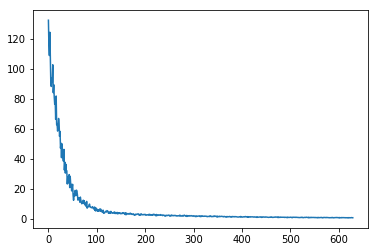

In [8]:
plt.plot(l_arr)
plt.show()

## 绘制最终预测结果曲线

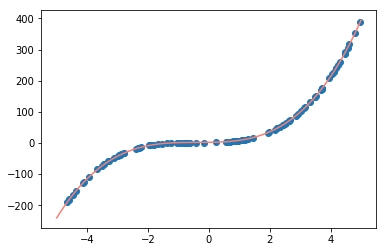

In [18]:
line_space = np.linspace(-5, 5, 1024)
with tf.Session(graph=graph) as sess:
    sess.run(tf.assign(W, res))
    t = sess.run(y_pred, {x_t:line_space.reshape(-1, 1)})

plt.scatter(x[:100], y[:100])
plt.plot(line_space, t, 'salmon')
#plt.show()

$y = 1.5 + x + 3x^2 + 2.5x^3$

In [10]:
res

array([[ 0.47039996],
       [ 0.59255391],
       [ 3.20000409],
       [ 2.5224473 ],
       [-0.0073717 ]])